## Supervised machine learning with Scikit-learn

This notebook servs as a practice for the main sckit-learn tools for machine learning and statsitical modelling. 

I will use the "utility.dat.txt" file from the
<a href=" http://jse.amstat.org/jse_data_archive.htm"> Journal of Statistics education</a> datasets, containing energy consumption of a residential house. The energy consumption is linked to the
outdoor temperature and size of the house. For a home of a fixed size, we can predict variations in energy consumption with outside temperature over time. If we add new rooms to the house, we expect that electricity usage will increase. We can also explore relations between different variables in this data set and predict the energy demand for the following months. 

### 1. Exploratory data analysis 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#importing "utility" data set
file ='Data/utility.dat.txt'

#defining column names
column_names=['date', 'day_in_month', 'temp_month', 'gas_usage_day','terms_month', 
              'billing_days_gc', 'kilowatt_total', 'kilowatt_day', 'billing_days_ec', 
              'kwh', 'days_heating', 'days_cooling', 'nroom']

#creating dataframe with 12 columns and date as an index column
df= pd.read_csv(file, header=None, 
               sep='\s+',
               names=column_names,
               index_col='date')  
                
#printing the first lines of the dataframe df
print(df.head(5))

        day_in_month  temp_month gas_usage_day terms_month billing_days_gc  \
date                                                                         
Sep-90            30          62           0.8          24              30   
Oct-90            31          56           2.1          61              29   
Nov-90            30          45           4.9         159              32   
Dec-90            31          37           6.1         185              30   
Jan-91            31          27           8.3         275              33   

        kilowatt_total  kilowatt_day  billing_days_ec  kwh  days_heating  \
date                                                                       
Sep-90             432          14.4               30    0           128   
Oct-90             469          15.6               30    1           299   
Nov-90             339          10.6               32    0           603   
Dec-90             408          14.1               29    1           866 

In [3]:
#displaying column types
print(df.dtypes)

day_in_month         int64
temp_month           int64
gas_usage_day       object
terms_month         object
billing_days_gc     object
kilowatt_total       int64
kilowatt_day       float64
billing_days_ec      int64
kwh                  int64
days_heating         int64
days_cooling         int64
nroom                int64
dtype: object


In [4]:
#displaying df infos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, Sep-90 to May-97
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   day_in_month     81 non-null     int64  
 1   temp_month       81 non-null     int64  
 2   gas_usage_day    81 non-null     object 
 3   terms_month      81 non-null     object 
 4   billing_days_gc  81 non-null     object 
 5   kilowatt_total   81 non-null     int64  
 6   kilowatt_day     81 non-null     float64
 7   billing_days_ec  81 non-null     int64  
 8   kwh              81 non-null     int64  
 9   days_heating     81 non-null     int64  
 10  days_cooling     81 non-null     int64  
 11  nroom            81 non-null     int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 8.2+ KB
None


Text(0, 0.5, 'Mean monthly temperature (F)')

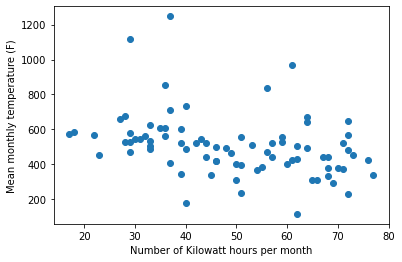

In [5]:
#plotting energy consumption v.s. temperature 
plt.scatter(df['temp_month'], df['kilowatt_total'])
plt.xlabel('Number of Kilowatt hours per month')
plt.ylabel('Mean monthly temperature (F)')